pre-requisite:
```
$ test_performance.py > perf.json
```

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import json
from pprint import pprint

with open("perf.json") as fh:
    data = json.load(fh)

pprint(data)


{'func0': {'func0': 0.01857508359971689,
           'func0_decorated': 0.08839765839948086,
           'func0_def': 0.033667399800469865,
           'func0_fpo': 0.05974090840027202},
 'func1': {'func1': 0.018800433399883333,
           'func1_decorated': 0.09254702500111307,
           'func1_def': 0.040771583200694295,
           'func1_fpo': 0.05874096680054208},
 'func5': {'func5': 0.021719867000501835,
           'func5_decorated': 0.09715134979996946,
           'func5_def': 0.04618934200043441,
           'func5_fpo': 0.06438937500061001}}


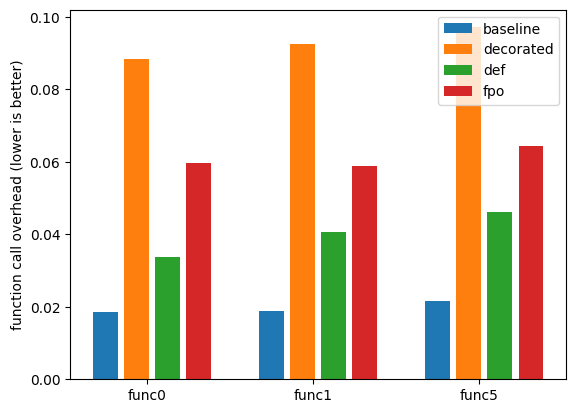

In [3]:
fig, ax = plt.subplots()
bar_width=0.75
ntypes = len(data["func0"])
offset = bar_width / ntypes

for i in range(ntypes):
    x = np.arange(3) + i * offset
    y = [list(dat.values())[i] for dat in data.values()]

    label = list(data["func0"].keys())[i].removeprefix("func0_")
    if label == "func0":
        label = "baseline"
    ax.bar(x, y, width=bar_width/5, label=label)

ax.set_xticks([0.25, 1.25, 2.25])
ax.set_xticklabels(list(data.keys()))

ax.set_ylabel("function call overhead (lower is better)")

ax.legend()